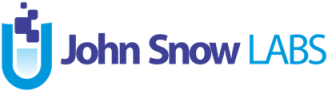

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlptest/blob/main/demo/tutorials/AI21_QA_Testing_Notebook.ipynb)

**nlptest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy, OpenAI, AI21 or Cohere** models, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification and Question Answering (QA) model using the library. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with nlptest on John Snow Labs

In [ ]:
!pip install nlptest

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the nlptest library in the following way.

In [2]:
#Import Harness from the nlptest library
from nlptest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (text-classification or ner)|
|**model**     |PipelineModel or path to a saved model or pretrained pipeline/model from hub.
|**data**       |Path to the data that is to be used for evaluation. Can be .csv or .conll file in the CoNLL format 
|**config**     |Configuration for the tests to be performed, specified in form of a YAML file.
|**hub**       |model hub to load from the path. Required if model param is passed as path.|

<br/>
<br/>

# AI21 Model Testing For Question Answering

In this section, we dive into testing of AI21 models in Question Answering task.

nlptest supports robustness tests for LLM testing for now.

### Set environment for AI21

In [3]:
import os
os.environ["AI21_API_KEY"] = "<YOUR_API_KEY>"

### Setup and Configure Harness

In [4]:
harness = Harness(task="question-answering", hub="ai21", model="j2-jumbo-instruct", data='BoolQ-test-tiny')

We have specified task as QA, hub as AI21 and model as `j2-jumbo-instruct`.

For dataset we used BoolQ-test-tiny which includes 50 lines from BoolQ-test. Other available datasets are:

* `BoolQ-test-tiny`
* `BoolQ-test`
* `BoolQ-combined`
* `NQ-open-test`
* `NQ-open-combined`
* `NQ-open-test-tiny`



For tests we used lowercase and uppercase. Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`

Available Bias tests for QA task are:

* `replace_to_male_pronouns`
* `replace_to_female_pronouns`
* `replace_to_neutral_pronouns`
* `replace_to_high_income_country`
* `replace_to_low_income_country`
* `replace_to_upper_middle_income_country`
* `replace_to_lower_middle_income_country`
* `replace_to_white_firstnames`
* `replace_to_black_firstnames`
* `replace_to_hispanic_firstnames`
* `replace_to_asian_firstnames`
* `replace_to_white_lastnames`
* `replace_to_sikh_names`
* `replace_to_christian_names`
* `replace_to_hindu_names`
* `replace_to_muslim_names`
* `replace_to_inter_racial_lastnames`
* `replace_to_native_american_lastnames`
* `replace_to_asian_lastnames`
* `replace_to_hispanic_lastnames`
* `replace_to_black_lastnames`
* `replace_to_parsi_names`
* `replace_to_jain_names`
* `replace_to_buddhist_names`


Available Representation tests for QA task are:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`



Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`


You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `maxTokens:` Maximum number of output tokens allowed for model.

In [5]:
harness.configure({
    'model_parameters': {
      'maxTokens': 512
    },
    
    'tests': {
      'defaults':{
        'min_pass_rate': 1.00
      },

      'robustness':{
        'lowercase': {'min_pass_rate': 0.70},
        'uppercase': {'min_pass_rate': 0.70}
      }
    }
})

{'model_parameters': {'maxTokens': 512},
 'tests': {'defaults': {'min_pass_rate': 1.0},
  'robustness': {'lowercase': {'min_pass_rate': 0.7},
   'uppercase': {'min_pass_rate': 0.7}}}}

Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.


### Generating the test cases.

In [6]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1013.85it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [7]:
harness.testcases()

,category,test_type,original_question,original_context,perturbed_question,perturbed_context
0,robustness,lowercase,is the first series 20 euro note still legal t...,20 euro note -- Until now there has been only ...,is the first series 20 euro note still legal t...,20 euro note -- until now there has been only ...
1,robustness,lowercase,do the champions league winners get automatic ...,2018–19 UEFA Champions League -- The final wil...,do the champions league winners get automatic ...,2018–19 uefa champions league -- the final wil...
2,robustness,lowercase,can a bull snake kill a small dog,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,bullsnake -- bullsnakes are very powerful cons...
3,robustness,lowercase,are all nba playoff games best of 7,NBA playoffs -- All rounds are best-of-seven s...,are all nba playoff games best of 7,nba playoffs -- all rounds are best-of-seven s...
4,robustness,lowercase,can i use my train ticket on the tram in manch...,Manchester station group -- The Manchester sta...,can i use my train ticket on the tram in manch...,manchester station group -- the manchester sta...
...,...,...,...,...,...,...
95,robustness,uppercase,is puerto a part of the united states,Puerto Rico -- Puerto Rico (Spanish for ``Rich...,IS PUERTO A PART OF THE UNITED STATES,PUERTO RICO -- PUERTO RICO (SPANISH FOR ``RICH...
96,robustness,uppercase,is devil's knot based on west memphis 3,West Memphis Three -- There have been a number...,IS DEVIL'S KNOT BASED ON WEST MEMPHIS 3,WEST MEMPHIS THREE -- THERE HAVE BEEN A NUMBER...
97,robustness,uppercase,are any of the original temptations still in t...,"The Temptations -- As of 2017, the Temptations...",ARE ANY OF THE ORIGINAL TEMPTATIONS STILL IN T...,"THE TEMPTATIONS -- AS OF 2017, THE TEMPTATIONS..."
98,robustness,uppercase,is the isle of wight part of hampshire,Isle of Wight -- The Isle of Wight (/waɪt/; al...,IS THE ISLE OF WIGHT PART OF HAMPSHIRE,ISLE OF WIGHT -- THE ISLE OF WIGHT (/WAꞮT/; AL...


harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [8]:
harness.run()

Running testcases... : 100%|██████████| 100/100 [03:05<00:00,  1.85s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [9]:
harness.generated_results()

,category,test_type,original_question,original_context,perturbed_question,perturbed_context,expected_result,actual_result,pass
0,robustness,lowercase,is the first series 20 euro note still legal t...,20 euro note -- Until now there has been only ...,is the first series 20 euro note still legal t...,20 euro note -- until now there has been only ...,\nFalse.,\nTrue.,False
1,robustness,lowercase,do the champions league winners get automatic ...,2018–19 UEFA Champions League -- The final wil...,do the champions league winners get automatic ...,2018–19 uefa champions league -- the final wil...,\nTrue,\nTrue,True
2,robustness,lowercase,can a bull snake kill a small dog,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,bullsnake -- bullsnakes are very powerful cons...,\nFalse.,\nFalse.,False
3,robustness,lowercase,are all nba playoff games best of 7,NBA playoffs -- All rounds are best-of-seven s...,are all nba playoff games best of 7,nba playoffs -- all rounds are best-of-seven s...,\nTrue,\nTrue.,True
4,robustness,lowercase,can i use my train ticket on the tram in manch...,Manchester station group -- The Manchester sta...,can i use my train ticket on the tram in manch...,manchester station group -- the manchester sta...,\nFalse.,\nFalse.,False
...,...,...,...,...,...,...,...,...,...
95,robustness,uppercase,is puerto a part of the united states,Puerto Rico -- Puerto Rico (Spanish for ``Rich...,IS PUERTO A PART OF THE UNITED STATES,PUERTO RICO -- PUERTO RICO (SPANISH FOR ``RICH...,\nFalse.,\nFalse.,False
96,robustness,uppercase,is devil's knot based on west memphis 3,West Memphis Three -- There have been a number...,IS DEVIL'S KNOT BASED ON WEST MEMPHIS 3,WEST MEMPHIS THREE -- THERE HAVE BEEN A NUMBER...,\nFalse.,\nFalse.,False
97,robustness,uppercase,are any of the original temptations still in t...,"The Temptations -- As of 2017, the Temptations...",ARE ANY OF THE ORIGINAL TEMPTATIONS STILL IN T...,"THE TEMPTATIONS -- AS OF 2017, THE TEMPTATIONS...",\nTrue.,\nTrue,True
98,robustness,uppercase,is the isle of wight part of hampshire,Isle of Wight -- The Isle of Wight (/waɪt/; al...,IS THE ISLE OF WIGHT PART OF HAMPSHIRE,ISLE OF WIGHT -- THE ISLE OF WIGHT (/WAꞮT/; AL...,\nTrue,\nFalse.,False


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [10]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,28,22,44%,70%,False
1,robustness,uppercase,32,18,36%,70%,False


In [12]:
df = harness.generated_results()

In [13]:
df[df['pass']==False]

,category,test_type,original_question,original_context,perturbed_question,perturbed_context,expected_result,actual_result,pass
2,robustness,lowercase,can a bull snake kill a small dog,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,bullsnake -- bullsnakes are very powerful cons...,\nFalse.,\nFalse.,False
4,robustness,lowercase,can i use my train ticket on the tram in manch...,Manchester station group -- The Manchester sta...,can i use my train ticket on the tram in manch...,manchester station group -- the manchester sta...,\nFalse.,\nFalse.,False
5,robustness,lowercase,is hunger games mockingjay part 2 the last movie,The Hunger Games: Mockingjay – Part 2 -- The H...,is hunger games mockingjay part 2 the last movie,the hunger games: mockingjay – part 2 -- the h...,\nTrue,\nFalse.,False
6,robustness,lowercase,can you run methanol in a gas engine,Methanol fuel -- Both methanol and ethanol bur...,can you run methanol in a gas engine,methanol fuel -- both methanol and ethanol bur...,\nFalse,\nFalse.,False
8,robustness,lowercase,was oceans 8 based on a true story,Ocean's 8 -- Ocean's 8 (stylized onscreen as O...,was oceans 8 based on a true story,ocean's 8 -- ocean's 8 (stylized onscreen as o...,\nFalse.,\nFalse.,False
9,robustness,lowercase,can you turn left on red in canada,"Turn on red -- In Canada, left turn on red lig...",can you turn left on red in canada,"turn on red -- in canada, left turn on red lig...",\nFalse.,\nFalse.,False
10,robustness,lowercase,does volatility of a substance depend on its d...,Volatility (chemistry) -- In chemistry and phy...,does volatility of a substance depend on its d...,volatility (chemistry) -- in chemistry and phy...,\nFalse.,\nFalse.,False
13,robustness,lowercase,are they still making new episodes of the simp...,The Simpsons -- Since its debut on December 17...,are they still making new episodes of the simp...,the simpsons -- since its debut on december 17...,\nFalse.,\nTrue,False
15,robustness,lowercase,is it the law to pull over for an ambulance,"Move over law -- Currently, only Washington, D...",is it the law to pull over for an ambulance,"move over law -- currently, only washington, d...",\nFalse.,\nFalse.,False
16,robustness,lowercase,is there such a thing as designated survivor,"Designated survivor -- In the United States, a...",is there such a thing as designated survivor,"designated survivor -- in the united states, a...",\nTrue,\nFalse.,False


In [16]:
print(df.iloc[96]['expected_result'])
print(df.iloc[96]['actual_result'])


True

False.


#### NQ-open-test dataset testing

We can also use another dataset, NQ-open for testing the model.

In [17]:
harness = Harness(task="question-answering", hub="ai21", model="j2-jumbo-instruct", data='NQ-open-test-tiny')

In [18]:
harness.configure({
    'model_parameters': {
      'maxTokens': 512
    },
    'tests': {
      'defaults':{
        'min_pass_rate': 1.00
      },

      'robustness':{
        'lowercase': {'min_pass_rate': 0.70},
        'uppercase': {'min_pass_rate': 0.70}
      }
    }
})

{'model_parameters': {'maxTokens': 512},
 'tests': {'defaults': {'min_pass_rate': 1.0},
  'robustness': {'lowercase': {'min_pass_rate': 0.7},
   'uppercase': {'min_pass_rate': 0.7}}}}

In [19]:
harness.generate()

Generating testcases...: 100%|██████████| 2/2 [00:00<00:00, 1998.24it/s]


In [20]:
harness.testcases()

,category,test_type,original_question,original_context,perturbed_question,perturbed_context
0,robustness,lowercase,on the 6th day of christmas my true love sent ...,-,on the 6th day of christmas my true love sent ...,-
1,robustness,lowercase,how many 5 star generals are there in the us,-,how many 5 star generals are there in the us,-
2,robustness,lowercase,who killed natalie and ann in sharp objects,-,who killed natalie and ann in sharp objects,-
3,robustness,lowercase,how many costco locations are there in the us,-,how many costco locations are there in the us,-
4,robustness,lowercase,who played grand moff tarkin in rogue one,-,who played grand moff tarkin in rogue one,-
...,...,...,...,...,...,...
95,robustness,uppercase,who has the most followers on the twitter,-,WHO HAS THE MOST FOLLOWERS ON THE TWITTER,-
96,robustness,uppercase,who said it's not what your country can do for...,-,WHO SAID IT'S NOT WHAT YOUR COUNTRY CAN DO FOR...,-
97,robustness,uppercase,when does lil wayne new album drop 2018,-,WHEN DOES LIL WAYNE NEW ALBUM DROP 2018,-
98,robustness,uppercase,the khajuraho temples are especially well know...,-,THE KHAJURAHO TEMPLES ARE ESPECIALLY WELL KNOW...,-


In [21]:
harness.run()

Running testcases... : 100%|██████████| 100/100 [05:07<00:00,  3.08s/it]


In [22]:
df = harness.generated_results()

In [23]:
df

,category,test_type,original_question,original_context,perturbed_question,perturbed_context,expected_result,actual_result,pass
0,robustness,lowercase,on the 6th day of christmas my true love sent ...,-,on the 6th day of christmas my true love sent ...,-,6 geese a-laying.,6 geese a-laying.,True
1,robustness,lowercase,how many 5 star generals are there in the us,-,how many 5 star generals are there in the us,-,\nThere are 11 5-star generals in the US milit...,\nThere are 11 5-star generals in the US milit...,True
2,robustness,lowercase,who killed natalie and ann in sharp objects,-,who killed natalie and ann in sharp objects,-,"\nIn Sharp Objects, Natalie Keene and Ann Nash...","\nIn Sharp Objects, Natalie Keene and Ann Nash...",True
3,robustness,lowercase,how many costco locations are there in the us,-,how many costco locations are there in the us,-,\nThere are 558 Costco locations in the United...,\nThere are 558 Costco locations in the United...,True
4,robustness,lowercase,who played grand moff tarkin in rogue one,-,who played grand moff tarkin in rogue one,-,Peter Cushing,Peter Cushing,True
...,...,...,...,...,...,...,...,...,...
95,robustness,uppercase,who has the most followers on the twitter,-,WHO HAS THE MOST FOLLOWERS ON THE TWITTER,-,"\nAs of 2021, the most followed person on Twit...","\nAs of 2021, the most followed person on Twit...",True
96,robustness,uppercase,who said it's not what your country can do for...,-,WHO SAID IT'S NOT WHAT YOUR COUNTRY CAN DO FOR...,-,\nJohn F. Kennedy,"\nJohn F. Kennedy said ""Ask not what your coun...",True
97,robustness,uppercase,when does lil wayne new album drop 2018,-,WHEN DOES LIL WAYNE NEW ALBUM DROP 2018,-,"Lil Wayne's new album, ""Tha Carter V,"" was re...","Lil Wayne's new album ""Tha Carter V"" was rele...",True
98,robustness,uppercase,the khajuraho temples are especially well know...,-,THE KHAJURAHO TEMPLES ARE ESPECIALLY WELL KNOW...,-,The Khajuraho temples are especially well kno...,The Khajuraho temples are famous for their er...,True


In [24]:
df[df['pass']==False]

,category,test_type,original_question,original_context,perturbed_question,perturbed_context,expected_result,actual_result,pass
51,robustness,uppercase,how many 5 star generals are there in the us,-,HOW MANY 5 STAR GENERALS ARE THERE IN THE US,-,\nThere are 11 5-star generals in the US milit...,There are 14 five star generals in the US.,False
56,robustness,uppercase,who wrote the miraculous journey of edward tulane,-,WHO WROTE THE MIRACULOUS JOURNEY OF EDWARD TULANE,-,\nWilliam Steig wrote the book The Miraculous ...,\nThe Miraculous Journey of Edward Tulane was ...,False
70,robustness,uppercase,who wrote you're a grand ol flag,-,WHO WROTE YOU'RE A GRAND OL FLAG,-,"\nThe author of ""You're a grand old flag"" is G...","\nFrancis Scott Key wrote ""You're a Grand Ol' ...",False
73,robustness,uppercase,where does the electron come from in beta decay,-,WHERE DOES THE ELECTRON COME FROM IN BETA DECAY,-,\nThe electron in beta decay comes from the pa...,\nThe electron comes from the neutrino in beta...,False
80,robustness,uppercase,which crusade did not make it to jerusalem,-,WHICH CRUSADE DID NOT MAKE IT TO JERUSALEM,-,The Fifth Crusade did not make it to Jerusalem.,The Crusade of Frederick Barbarossa,False
92,robustness,uppercase,where does love it or list too take place,-,WHERE DOES LOVE IT OR LIST TOO TAKE PLACE,-,"\nLove It or List It takes place in Toronto, C...",\nThe show takes place in various cities acros...,False


In [25]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,0,50,100%,70%,True
1,robustness,uppercase,6,44,88%,70%,True
